# Get Model Verification Data 
(from CARIACO hydrography master)

this R notebook extracts Model Verification Data from the Hydrography Master (June 2018) file which is a collection monthly sampled data at CARIACO Ocean Time Series Station.

In [1]:
require(dplyr, warn.conflicts = FALSE);
#require(ggplot2);
require(cowplot, warn.conflicts = FALSE); # for nicer plots, includes ggplot2

Loading required package: dplyr
Loading required package: cowplot
Loading required package: ggplot2


In [4]:
# read processed hydrography master
phm <- read.csv("DATA_processed/Master_Hydrography_June2018_cleaned.csv")

In [5]:
names(phm) # check for available data

[1] "X"                     "Cruise"                "Leg"                  
 [4] "Day"                   "Month"                 "Year"                 
 [7] "Date"                  "Depth_target"          "Depth_real"           
[10] "O2_.ml.L."             "O2_..mol.kg."          "NO3_UDO"              
[13] "PO4_UDO"               "Si.OH.4_UDO"           "NH4_USF"              
[16] "NO2_USF"               "NO3.NO2_USF"           "PO4_USF"              
[19] "Si.OH.4_USF"           "pH"                    "Alkalinity_.mol.kg."  
[22] "Alkalinity_..mol.kg."  "TCO2"                  "fCO2"                 
[25] "pH_corrected"          "TCO2_corrected"        "fCO2_corrected"       
[28] "Salinity_bottles"      "Salinity_CTD"          "Temperature"          
[31] "Sigma.t"               "TPP"                   "PIP"                  
[34] "POC_..g.kg."           "PN_..g.kg."            "POC_..g.L."           
[37] "PN_..g.L."             "C.N_particulate"       "DON"                  
[40] "DOP"                   "DOC"                   "TOC"                  
[43] "PrimaryProductivity"   "Chlorophyll"           "Phaeopigments"        
[46] "Total.Prokaryotes."    "Bact_Biomass_.mgC.m3." "Bact_Biomass_..MC."   
[49] "DateString"            "yday"

In [6]:
#convert date from character to ct for later plotting
phm$Date <- as.POSIXct(phm$Date, format="%Y-%m-%d")

In [7]:
# get only surface data (above 15 m depth)
# ChlA
phm_surface <- subset(phm, Depth_real <= 15)

Warning message:
“Removed 8 rows containing missing values (geom_point).”

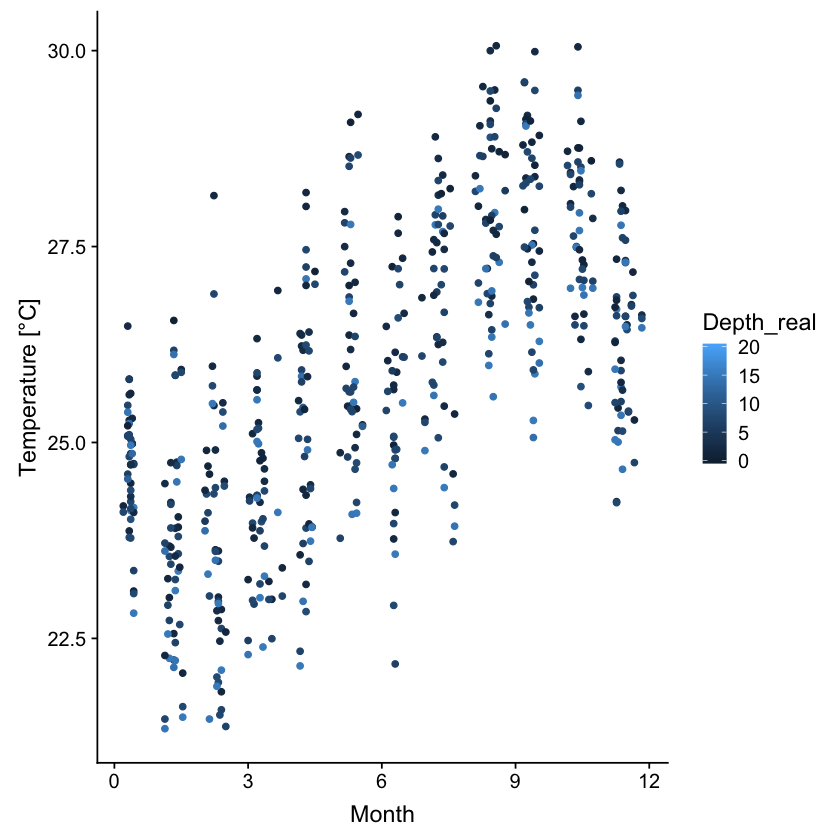

In [8]:
#plotting Temperature data as a test
temp_y <- ggplot(phm_surface, aes(yday/30, Temperature, col=Depth_real)) +
  geom_point() + 
  xlab("Month") + ylab("Temperature [°C]") + scale_color_continuous(limits=c(0,20))
temp_y

now that the data is prepped
# extract Data into csv
  
- ChlA
- Nitrate
- Silicate

Still to add:
- Zooplankton (in another datafile!)

In [7]:
# ChlA # units: mg/m3
ChlA <- data.frame(phm_surface$yday,phm_surface$Chlorophyll)
names(ChlA) <- c("yday","ChlA")
ChlA <- ChlA[complete.cases(ChlA), ]
write.csv(ChlA, file = "../../DataFiles_Processed/ChlA_bottle_yearly_surface.csv", row.names=FALSE)


In [8]:
# Nitrate # µM (=mmol/m^3)
NO3NO2 <- data.frame(phm_surface$yday,phm_surface$NO3.NO2_USF)
names(NO3NO2) <- c("yday","NO3NO2")
NO3NO2 <- NO3NO2[complete.cases(NO3NO2), ]
write.csv(NO3NO2, file = "../../DataFiles_Processed/NO3NO2_bottle_yearly_surface.csv", row.names=FALSE)

In [9]:
# Silicate # µM (=mmol/m^3)
# two seperate columns as two seperate data files (due to change in lab)
SiOH_UDO <- data.frame(phm_surface$yday, phm_surface$Si.OH.4_UDO)
SiOH_USF <- data.frame(phm_surface$yday, phm_surface$Si.OH.4_USF)
names(SiOH_UDO) <- c("yday","SiOH")
names(SiOH_USF) <- c("yday","SiOH")
SiOH_UDO <- SiOH_UDO[complete.cases(SiOH_UDO), ]
SiOH_USF <- SiOH_USF[complete.cases(SiOH_USF), ]

write.csv(SiOH_UDO, file = "../../DataFiles_Processed/SiOH_UDO_bottle_yearly_surface.csv", row.names=FALSE)
write.csv(SiOH_USF, file = "../../DataFiles_Processed/SiOH_USF_bottle_yearly_surface.csv", row.names=FALSE)

# Get Zooplankton Data
from the cleaned Zooplankton Master file

In [10]:
# Zooplankton
# Note: Tows were performed to 200 meters depth

# read file
zm <- read.csv("../../DataFiles_Processed/Master_Zooplankton_Nov2017_Cleaned.csv")

In [11]:
names(zm) # check for available data
zm

[1] "X"                 "CRUISE"            "Date"             
 [4] "YEAR"              "MONTH"             "Analyst"          
 [7] "Mesh.Size"         "TOTAL.DENSITY"     "BIOMASS"          
[10] "ASH"               "COPEPODOS"         "CALANOIDS"        
[13] "CYCLOPOIDA"        "HAPARCTICOIDA"     "POECILOSTOMATOIDA"
[16] "NA."               "L.FISH"            "H.FISH"           
[19] "CHAETOGNATHA"      "CLADOCEROS"        "OSTRACODA"        
[22] "FORAMINIFERA"      "AMPHIPODS"         "ISOPODS"          
[25] "EUPHAUSIIDS"       "MISYDACEA"         "SERGESTID"        
[28] "L.CRUSTACEA"       "N.COPEPOD"         "COPEPODITE"       
[31] "N.CIRRIPEDIA"      "L.CYPRIS"          "L.DECAPODA"       
[34] "L.STOMATOPODA"     "L.EUPHAUSIID"      "L.SERGESTID"      
[37] "NA.1"              "POLICHAETES"       "L.CYPHONAUTES"    
[40] "MEDUSA"            "SIPHONOPHORES"     "CTENOPHORES"      
[43] "L.ECHINODERMS"     "PTEROPODS"         "HETEROPODS"       
[46] "GASTROPODS"        "L.CEPHALOPODA"     "L.BIVALVE"        
[49] "L.GASTROPOD"       "PROTOZOAN"         "RADIOLARIAN"      
[52] "FORAMINIFERA.1"    "NA.2"              "NA.3"             
[55] "APPENDICULARIANS"  "SALPS"             "DOLIOLIDS"        
[58] "BIVALVES"          "H.CRUSTACEA"       "L.ANFIOXUS"       
[61] "LUCIFER"           "JUV..GASTROPOD"    "yday"

X,CRUISE,Date,YEAR,MONTH,Analyst,Mesh.Size,TOTAL.DENSITY,BIOMASS,ASH,⋯,NA.3,APPENDICULARIANS,SALPS,DOLIOLIDS,BIVALVES,H.CRUSTACEA,L.ANFIOXUS,LUCIFER,JUV..GASTROPOD,yday
1,71,2001-10-09,2001,10,Javier Gutierrez,500,213,15.90,3.3,⋯,NA,9.36,1.83,NA,NA,NA,,NA,,281
20,72,2001-11-06,2001,11,Javier Gutierrez,500,13,2.30,0.1,⋯,NA,0.52,0.52,NA,NA,NA,,NA,,309
39,73,2001-12-11,2001,12,Javier Gutierrez,500,9,0.70,0.2,⋯,NA,0.22,0.03,NA,0.03,0.26,,NA,,344
58,74,2002-01-10,2002,1,Javier Gutierrez,500,105,4.90,0.18,⋯,NA,0.10,18.00,NA,0.00,0.30,,0.4,,9
59,74,2002-01-10,2002,1,Javier Gutierrez,200,499,10.20,0.5,⋯,NA,3.20,37.30,NA,1.60,1.60,n.d.,NA,n.d.,9
96,75,2002-02-14,2002,2,Javier Gutierrez,200,612,12.90,2.6,⋯,NA,5.00,1.70,NA,NA,3.30,n.d.,NA,n.d.,44
97,75,2002-02-14,2002,2,Javier Gutierrez,500,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,,NA,,44
134,76,2002-03-12,2002,3,Javier Gutierrez,200,379,10.60,1.8,⋯,NA,5.70,5.70,NA,NA,NA,n.d.,1.1,n.d.,70
135,76,2002-03-12,2002,3,Javier Gutierrez,500,29,5.47,0.77,⋯,NA,NA,2.20,NA,0.10,NA,,0.4,,70
172,77,2002-04-02,2002,4,Javier Gutierrez,200,572,8.70,1.8,⋯,NA,13.30,3.10,NA,1.00,NA,n.d.,NA,n.d.,91


Warning message:
“Removed 4 rows containing missing values (geom_point).”

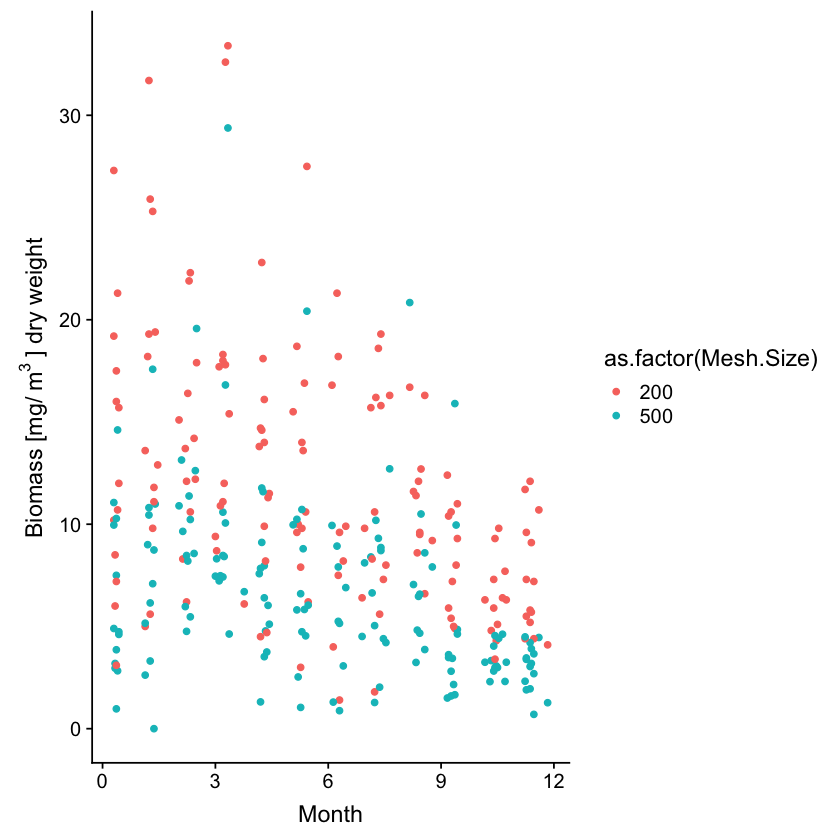

In [12]:
#plotting Biomass data as a test
zmbm_y <- ggplot(zm, aes(yday/30, BIOMASS, col=as.factor(Mesh.Size))) +
  geom_point() + 
  xlab("Month") + ylab(bquote('Biomass [mg/'~m^3~'] dry weight')) 

zmbm_y

In [24]:
# add both mesh values together for each cruise to get TOTAL ZOO Biomass
zmBM_agg <- zm %>% 
  group_by(CRUISE) %>% 
  summarise(BIOMASS = sum(BIOMASS),yday = max(yday))

In [25]:
# Zooplankton Biomass # [mg/m^3 dry weight]
ZooBM <- data.frame(zmBM_agg$yday, zmBM_agg$BIOMASS)
names(ZooBM) <- c("yday","ZooBM")
ZooBM <- ZooBM[complete.cases(ZooBM), ]
write.csv(ZooBM, file = "../../DataFiles_Processed/ZooBM_All.csv", row.names=FALSE)